In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter
from matplotlib import dates as mpld
from datetime import datetime
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
from matplotlib import font_manager, rc
font_path='C:/Windows/Fonts/malgunbd.ttf'
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
df=pd.read_csv('../../data/normal_simulation.csv')
df_copy = df.copy()
df_copy.set_index(df['update_time'], inplace=True)
df_copy

,update_time,heart_rate1,event1,heart_rate2,event2,heart_rate3,event3,heart_rate4,event4,heart_rate5,...,heart_rate996,event996,heart_rate997,event997,heart_rate998,event998,heart_rate999,event999,heart_rate1000,event1000
update_time,,,,,,,,,,,,,,,,,,,,,
2023-10-01 00:00:00,2023-10-01 00:00:00,72,0,101,1,77,0,77,0,95,...,83,0,82,0,64,0,66,0,84,0
2023-10-01 00:10:00,2023-10-01 00:10:00,69,0,70,0,99,0,92,0,95,...,90,0,82,0,87,0,89,0,87,0
2023-10-01 00:20:00,2023-10-01 00:20:00,92,0,90,0,100,0,85,0,81,...,87,0,88,0,90,0,78,0,87,0
2023-10-01 00:30:00,2023-10-01 00:30:00,84,0,74,0,86,0,81,0,78,...,85,0,76,0,82,0,65,0,90,0
2023-10-01 00:40:00,2023-10-01 00:40:00,85,0,75,0,67,0,83,0,103,...,71,0,84,0,81,0,85,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-10 08:10:00,2023-10-10 08:10:00,83,0,95,0,77,0,63,0,97,...,84,0,100,0,83,0,86,0,88,0
2023-10-10 08:20:00,2023-10-10 08:20:00,74,0,79,0,87,0,76,0,83,...,82,0,91,0,91,0,75,0,70,0
2023-10-10 08:30:00,2023-10-10 08:30:00,83,0,89,0,100,0,92,0,77,...,88,0,78,0,66,0,89,0,84,0


#### Decomposition
> 분기 데이터의 경우 k=4, 월별 데이터 k=12, 주별 데이터 k=7

###### tem_copy 주기 4,7,12별로 뭐가 다른지 보기 (addictive)

#### 가법 모형 시계열 분해 주기 별로 보기

c:\Users\jun99\OneDrive - 계명대학교\바탕 화면\Project\TP\분석 연습\ARIMA\holt-winters\holt\Lib\site-packages\statsmodels\tsa\seasonal.py:359: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
C:\Users\jun99\AppData\Local\Temp\ipykernel_32336\2245699939.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot(3, 1, 2)
C:\Users\jun99\AppData\Local\Temp\ipykernel_32336\2245699939.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax3 = plt.subplot(3,1,3)
C:\Users\jun99\AppData\Local\Temp\ipykernel_32336\2245699939.py:35: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


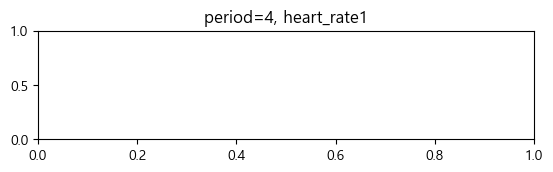

c:\Users\jun99\OneDrive - 계명대학교\바탕 화면\Project\TP\분석 연습\ARIMA\holt-winters\holt\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


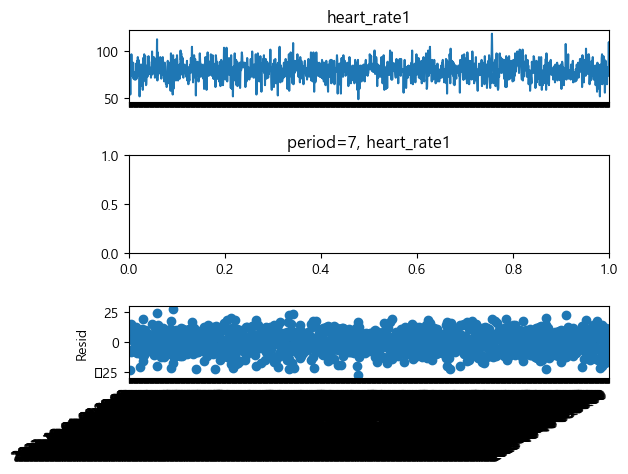

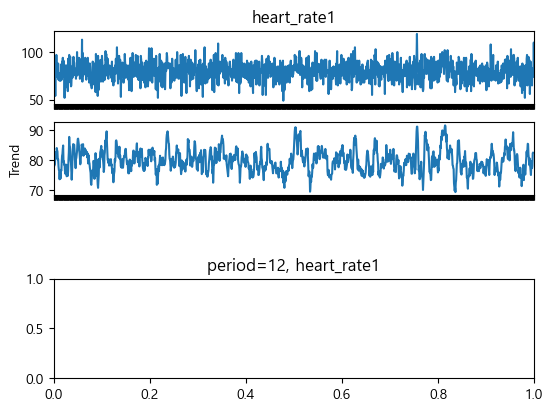

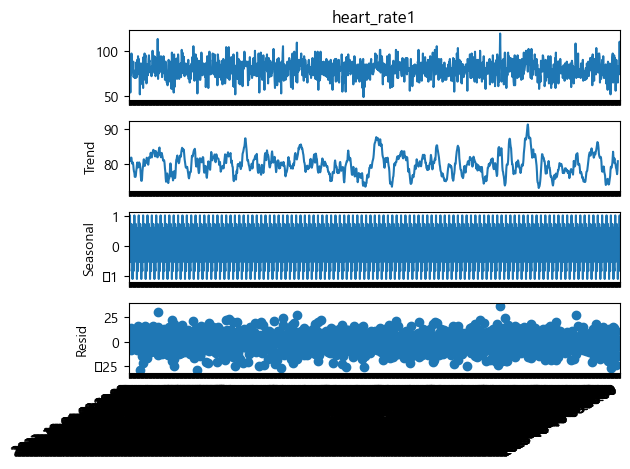

In [4]:
# Convert 'update_time' to datetime
# tem.index = pd.to_datetime(tem['update_time'], format='%Y. %m. %d. %H', errors='ignore')
# print(tem.head())

# Reset the index to make 'update_time' a regular column
# tem.reset_index(drop=True, inplace=True)

# Perform seasonal decomposition
ax1 = plt.subplot(3, 1, 1)
result1 = seasonal_decompose(tem['heart_rate1'], model='additive', period=4)
plt.title('period=4, heart_rate1')
result1.plot()
plt.gcf().autofmt_xdate()
# ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=5))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# second plot
ax2 = plt.subplot(3, 1, 2)
result2 = seasonal_decompose(tem['heart_rate1'], model='additive', period=7)
plt.title('period=7, heart_rate1')
result2.plot()
plt.gcf().autofmt_xdate()
# ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=5))
# ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# third plot
ax3 = plt.subplot(3,1,3)
result3 = seasonal_decompose(tem['heart_rate1'], model='additive', period=12)
plt.title('period=12, heart_rate1')
result3.plot()
plt.gcf().autofmt_xdate()
# ax3.xaxis.set_major_locator(mdates.MonthLocator(interval=5))
# ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()
plt.show()

###### tem_copy 주기 4,7,12별로 뭐가 다른지 보기 (multiplicative)

#### modeling

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

for j in range(1,1001):
# ES 모델을 만들어 학습하고 전체 데이터에 대해 예측한다.
# additive는 경향성이 일정함을 의미하고, 경향성 변동폭이 있을 때는 multiplicative를 사용
    model = ExponentialSmoothing(
        df_copy[f'heart_rate{i}'][:50], trend='additive', seasonal='additive', seasonal_periods=10).fit()
        
    prediction = model.predict(
        start=df_copy.index[0], end=df_copy.index[-1])

    """Brutlag Algorithm"""
    PERIOD = 12        # The given time series has seasonal_period=12
    GAMMA = 0  # the seasonility component
    SF = 1.96          # brutlag scaling factor for the confidence bands.
    UB = []            # upper bound or upper confidence band
    LB = []            # lower bound or lower confidence band

    # 실측치와 예측치를 비교하는 자료구조
    difference_array = []
    dt = []
    difference_table = {"actual": df_copy, "predicted": prediction, "difference": difference_array, "UB": UB, "LB": LB}

    # brutlag 알고리즘
    for i in range(len(prediction)):
        diff = df_copy.iloc[i]-prediction.iloc[i]
        if i < PERIOD:
            dt.append(GAMMA*abs(diff))
        else:
            dt.append(GAMMA*abs(diff) + (1-GAMMA)*dt[i-PERIOD])

    # 저장된 실측/결측 차이를 예측치의 95% 신뢰구간(1.96)으로 반영하여 Upper/Lower Band 계산
        difference_array.append(diff)
        UB.append(prediction[i]+SF*dt[i])
        LB.append(prediction[i]-SF*dt[i])
        
    """Classification of data points as either normal or anomaly"""
    normal = []
    normal_date = []
    anomaly = []
    anomaly_date = []

    # 신뢰구간을 벗어나는지 판단하여 normal, anomaly 결정
    for i in range(len(df_copy.index)):
        if ((UB[i] <= df_copy.iloc[i]).bool() or (LB[i] >= df_copy.iloc[i]).bool()) and i > PERIOD:
            anomaly_date.append(df_copy.index[i])
            anomaly.append(df_copy.iloc[i][0])
        else:
            normal_date.append(df_copy.index[i])
            normal.append(df_copy.iloc[i][0])
            
    anomaly = pd.DataFrame({"date": anomaly_date, "value": anomaly})
    anomaly.set_index('date', inplace=True)
    normal = pd.DataFrame({"date": normal_date, "value": normal})
    normal.set_index('date', inplace=True)

# # plotting
# plt.figure(figsize=(24,12))
# plt.plot(normal.index, normal, 'o', color='green')
# plt.plot(anomaly.index, anomaly, 'o', color='red')
# plt.plot(df_copy.index, UB, linestyle='--', color='grey')
# plt.plot(df_copy.index, LB, linestyle='--', color='grey')
# plt.gcf().autofmt_xdate()
# plt.legend(['Normal', 'Anomaly', 'Upper Bound', 'Lower Bound'],fontsize=15)
# plt.show()

##### 반복문 적용

In [24]:
df

,update_time,heart_rate1,event1,heart_rate2,event2,heart_rate3,event3,heart_rate4,event4,heart_rate5,...,heart_rate996,event996,heart_rate997,event997,heart_rate998,event998,heart_rate999,event999,heart_rate1000,event1000
0,2023-10-01 00:00:00,72,0,101,1,77,0,77,0,95,...,83,0,82,0,64,0,66,0,84,0
1,2023-10-01 00:10:00,69,0,70,0,99,0,92,0,95,...,90,0,82,0,87,0,89,0,87,0
2,2023-10-01 00:20:00,92,0,90,0,100,0,85,0,81,...,87,0,88,0,90,0,78,0,87,0
3,2023-10-01 00:30:00,84,0,74,0,86,0,81,0,78,...,85,0,76,0,82,0,65,0,90,0
4,2023-10-01 00:40:00,85,0,75,0,67,0,83,0,103,...,71,0,84,0,81,0,85,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,2023-10-10 08:10:00,83,0,95,0,77,0,63,0,97,...,84,0,100,0,83,0,86,0,88,0
1346,2023-10-10 08:20:00,74,0,79,0,87,0,76,0,83,...,82,0,91,0,91,0,75,0,70,0
1347,2023-10-10 08:30:00,83,0,89,0,100,0,92,0,77,...,88,0,78,0,66,0,89,0,84,0
1348,2023-10-10 08:40:00,110,1,81,0,82,0,72,0,86,...,66,0,67,0,71,0,70,0,65,0


In [23]:
df.iloc[:,:2]

,update_time,heart_rate1
0,2023-10-01 00:00:00,72
1,2023-10-01 00:10:00,69
2,2023-10-01 00:20:00,92
3,2023-10-01 00:30:00,84
4,2023-10-01 00:40:00,85
...,...,...
1345,2023-10-10 08:10:00,83
1346,2023-10-10 08:20:00,74
1347,2023-10-10 08:30:00,83
1348,2023-10-10 08:40:00,110


In [35]:
df_copy.drop(labels=['update_time'],axis=1,inplace=True)
df_copy

,heart_rate1,event1,heart_rate2,event2,heart_rate3,event3,heart_rate4,event4,heart_rate5,event5,...,heart_rate996,event996,heart_rate997,event997,heart_rate998,event998,heart_rate999,event999,heart_rate1000,event1000
update_time,,,,,,,,,,,,,,,,,,,,,
2023-10-01 00:00:00,72,0,101,1,77,0,77,0,95,0,...,83,0,82,0,64,0,66,0,84,0
2023-10-01 00:10:00,69,0,70,0,99,0,92,0,95,0,...,90,0,82,0,87,0,89,0,87,0
2023-10-01 00:20:00,92,0,90,0,100,0,85,0,81,0,...,87,0,88,0,90,0,78,0,87,0
2023-10-01 00:30:00,84,0,74,0,86,0,81,0,78,0,...,85,0,76,0,82,0,65,0,90,0
2023-10-01 00:40:00,85,0,75,0,67,0,83,0,103,1,...,71,0,84,0,81,0,85,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-10 08:10:00,83,0,95,0,77,0,63,0,97,0,...,84,0,100,0,83,0,86,0,88,0
2023-10-10 08:20:00,74,0,79,0,87,0,76,0,83,0,...,82,0,91,0,91,0,75,0,70,0
2023-10-10 08:30:00,83,0,89,0,100,0,92,0,77,0,...,88,0,78,0,66,0,89,0,84,0


In [ ]:
# difference_table = {"actual": df_copy[f'heart_rate{j}'], "predicted": result_i, "difference": difference_array, "UB": UB, "LB": LB}
# difference_table

In [ ]:
result_df = pd.DataFrame()

# 각 모델별로 df_copy['f'heart_rate{i}']번째 값을 train
for j in range(1,1001):
    model = ExponentialSmoothing(
        df_copy['heart_rate{}'.format(j)][:50], trend='additive', seasonal='additive', seasonal_periods=10).fit()

    # i번째 validation셋의 결과를 result{i}에 저장
    result_i = model.predict(
        start=df_copy.index[0], end=df_copy.index[-1])

    # result{i}를 result_df에 누적
    result_df[f'is_anomaly{j}'] = result_i
    # if j == 1:
    #     result_df[f'is_anomaly{j}'] = result_i
    # else:
    #     result_df[f'is_anomaly{j}'] = pd.concat([result_df, result_i], axis=1)
        
result_df.head()

In [ ]:
PERIOD = 12      
GAMMA = 0  
SF = 1.96         
UB = []           
LB = []            

for j in range(1,1001)
    # 실측치와 예측치를 비교하는 자료구조
    difference_array = []
    dt = []
    difference_table = {"actual": df_copy[f'heart_rate{j}'], "predicted": result_df[f'is_anomaly{j}'], "difference": difference_array, "UB": UB, "LB": LB}

    # brutlag 알고리즘
    for i in range(len(result_df)):
        diff = df_copy.iloc[f'heart_rate{j}']-result_df.iloc[:,i]
        if i < PERIOD:
            dt.append(GAMMA*abs(diff))
        else:
            dt.append(GAMMA*abs(diff) + (1-GAMMA)*dt[i-PERIOD])

    # 저장된 실측/결측 차이를 예측치의 95% 신뢰구간(1.96)으로 반영하여 Upper/Lower Band 계산
        difference_array.append(diff)
        UB.append(result_df[i]+SF*dt[i])
        LB.append(result_df[i]-SF*dt[i])
    
    if (diff > UB[i]) or (diff < LB[i]):
        is_anomaly[i] = 1
    else:
        is_anomaly[i] = 0

In [10]:
df_copy.shape

(1350, 2001)

##### 결과 표